In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from useful_functions import import_file, remove_before, remove_zeros, make_bins, make_equal_bins, surrounded_by_low_counts, peaks_for_specific_timeframe, show_valid_peaks
from scipy.signal import find_peaks

In [2]:
P_01 = import_file('Alta', '2P01')
P_01.dropna(subset=['Count'], inplace=True)

In [3]:
print(P_01)

                    Date  Count
0    2024-05-01 08:04:15    0.0
1    2024-05-01 08:19:15    0.0
2    2024-05-01 08:33:23    3.0
3    2024-05-01 08:38:22   97.0
4    2024-05-01 08:43:22    0.0
...                  ...    ...
8929 2024-04-30 22:49:11    0.0
8930 2024-04-30 23:04:11    0.0
8931 2024-04-30 23:19:12    0.0
8932 2024-04-30 23:34:12    0.0
8933 2024-04-30 23:49:12    0.0

[8810 rows x 2 columns]


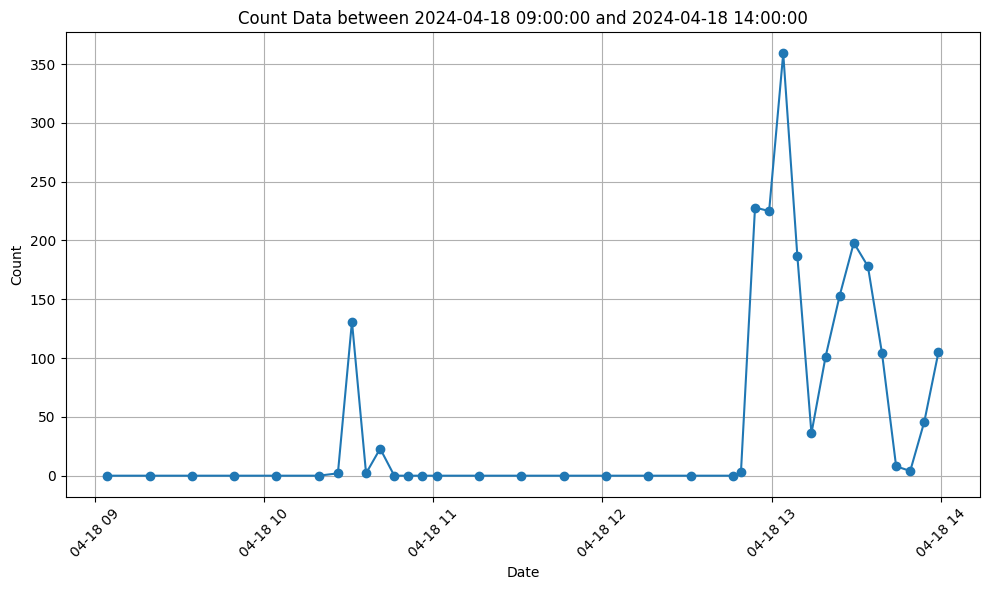

In [4]:
start_time = '2024-04-18 09:00:00'
end_time = '2024-04-18 14:00:00'
peaks_for_specific_timeframe(P_01, start_time, end_time)

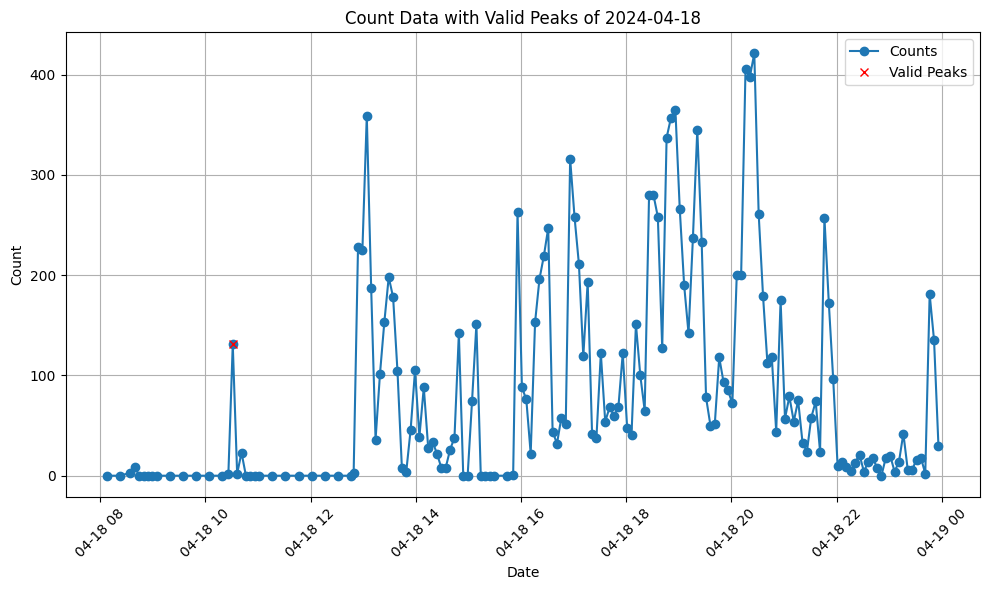

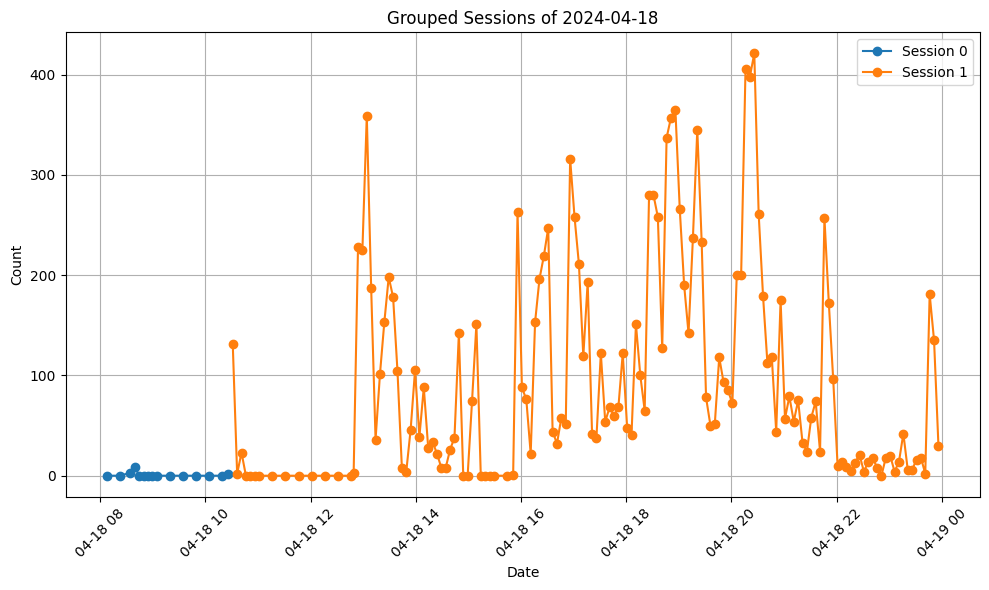

In [11]:
specific_day = '2024-04-18'
show_valid_peaks(P_01, specific_day, 20, 1)


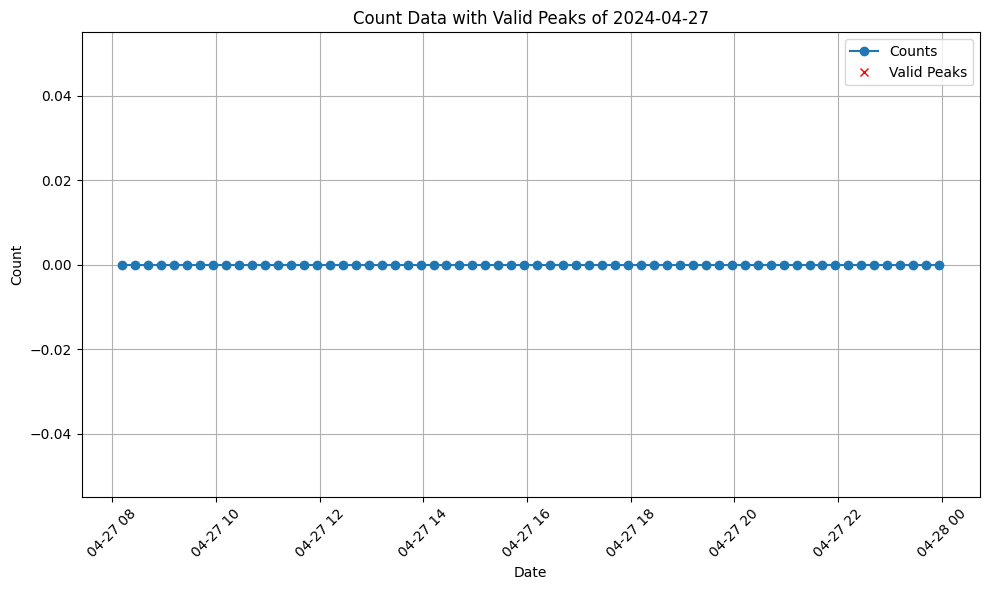

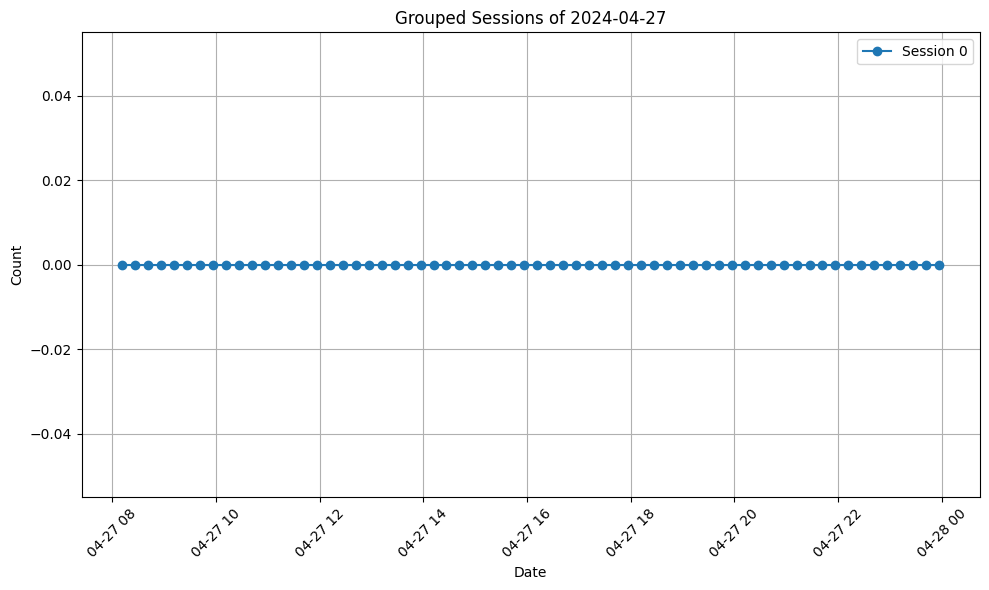

In [6]:
specific_day = '2024-04-27'
show_valid_peaks(P_01, specific_day, 5, 3)


In [7]:
B_55 = import_file('Locus', '2.B55')


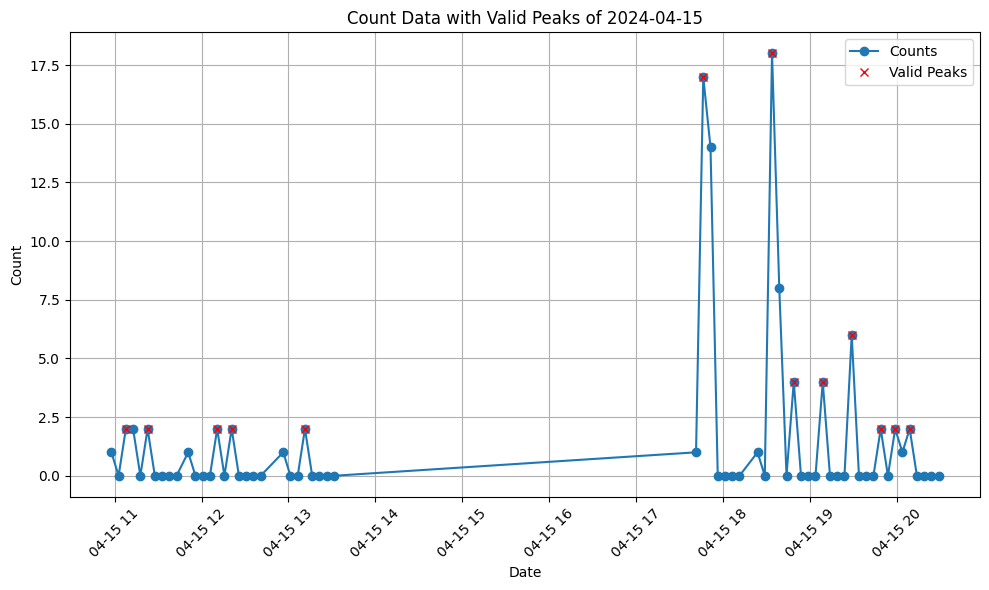

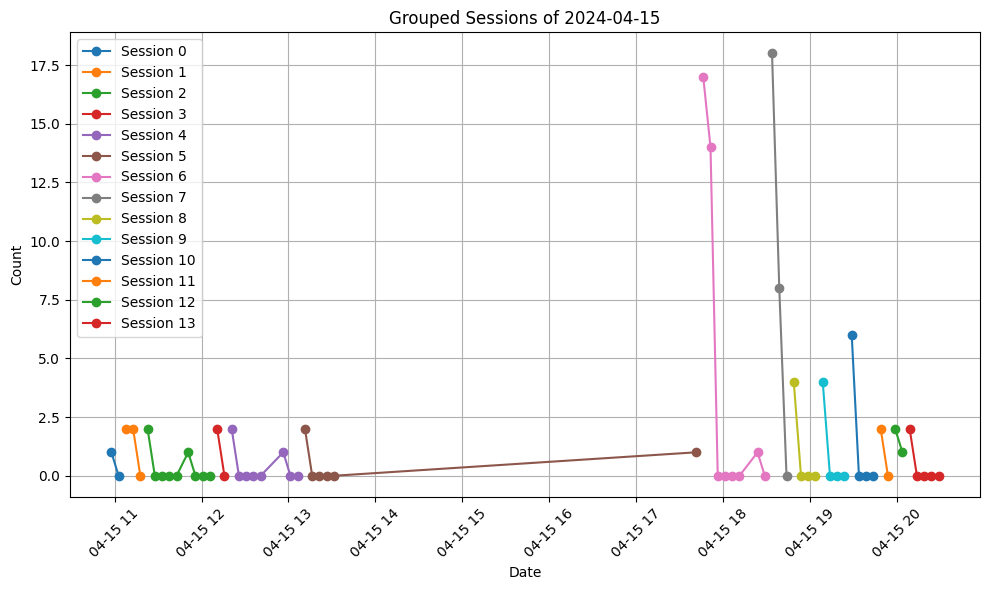

In [12]:
specific_day = '2024-04-15'
show_valid_peaks(B_55, specific_day, 20, 1)